In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read data from diabetes.csv to pandas dataframe
df = pd.read_csv('heart.csv')
df.head()

# We want to make a model that predicts whether or not the people in this dataset have a Cardiovascular disease (1) or not (0) based on the diagnostic
# columns and compare it to the actual result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Preliminary info on dataset
df.shape

(303, 14)

In [3]:
# Standardize Independent Varibles (Improves Accuracy and Speeds up Convergence)
my_columns = list(df.columns).remove('target')
scaler = StandardScaler()
indep_variables = scaler.fit_transform(df.drop('target',axis=1))

# Convert independent variable numpy array back to pandas dataframe
indep_variables = pd.DataFrame(indep_variables, columns = my_columns)

# Split dataset into training and testing sets
X, y = indep_variables, df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

In [4]:
# Defining Parameter Grid Dictionary for Hyper Parameter Tuning
param_grid = {'C': [ 1, 10, 100, 1000,10000],   
              'gamma': [1,0.1,0.01,0.001,0.0001]
              } 
  

# Create a SVM Classifier for the Grid Search
SVM_model = svm.SVC(random_state=0) 


# GridSearchCV searches over parameter grid and takes the best values (known as refitting)
grid = GridSearchCV(SVM_model, param_grid)
grid_search = grid.fit(X_train, y_train)


# Get the best parameters from the Grid Search
C_value = grid_search.best_params_['C']
Gamma = grid_search.best_params_['gamma']


# Use the best values from the Grid Search as parameters for your SVM Model 
# Fit SVM Model with your Data
SVM_model = svm.SVC(C = C_value, gamma = Gamma, random_state = 0).fit(X_train, y_train)

# Use SVM_model to Create Predictions
y_prediction = SVM_model.predict(X_test)

# Create Confusion Matrix Comparing the Predictions to Actual Results
cm = confusion_matrix(y_test, y_prediction)


# Print Best Parameters from Grid Search
print(f'The Best Parameters from the Grid Search: {grid.best_params_}')

The Best Parameters from the Grid Search: {'C': 1, 'gamma': 0.01}


Model Accuracy for our Training Dataset with Tuning: 84.21%


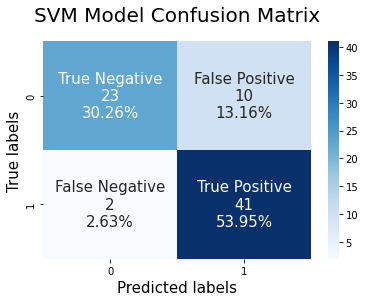

In [5]:
# Create labels for the Confusion Matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  # fmt = '' is necessary because fmt = 'g' (scientific notation format) is default
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('SVM Model Confusion Matrix', pad = 20, fontsize=20);

# Print Accuracy Score
print("Model Accuracy for our Training Dataset with Tuning: {:.2f}%".format(accuracy_score(y_test, y_prediction) * 100))